In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import pathlib
import matplotlib.pyplot as plt

In [2]:
# Importing Tensorflow
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.12.0


In [6]:
!pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-562wv4fg
  Running command git clone --filter=blob:none --quiet https://github.com/tensorflow/docs /tmp/pip-req-build-562wv4fg
  Resolved https://github.com/tensorflow/docs to commit 6bdd89b797e9e055d093b41bb755a8477904ce84
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-2023.7.13.64986-py3-none-any.whl size=184123 sha256=0d2c41da711c346964bd616a73105562e981537360a482d11dc8df212f5e27af
  Stored in directory: /tmp/pip-ephem-wheel-cache-nckxsw1s/wheels/86/0f/1e/3b62293c8ffd0fd5a49508e6871cdb7554abe9c62afd35ec53
Successfully built tensorflow-docs


In [7]:
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling


In [8]:

#plotly used for plotting Interactive Graphs
!pip install plotly
import plotly.offline as py
import plotly.express as px
import plotly.graph_objs as go

In [9]:

dataset = pd.read_csv('final_data.csv')
dataset

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black


In [10]:

dataset.describe()

,red,green,blue
count,5052.000000,5052.000000,5052.000000
mean,127.416073,126.316310,128.296912
std,73.958449,74.927131,74.174008
min,0.000000,0.000000,0.000000
25%,63.000000,60.000000,63.000000
50%,128.000000,127.000000,130.000000
75%,191.000000,192.000000,192.000000
max,255.000000,255.000000,255.000000


In [11]:

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5052 entries, 0 to 5051
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   red     5052 non-null   int64 
 1   green   5052 non-null   int64 
 2   blue    5052 non-null   int64 
 3   label   5052 non-null   object
dtypes: int64(3), object(1)
memory usage: 158.0+ KB


In [12]:
dataset.isnull().sum()

red      0
green    0
blue     0
label    0
dtype: int64

In [13]:
dataset.label.unique()


array(['Blue', 'Brown', 'Green', 'Pink', 'Yellow', 'Orange', 'Purple',
       'Red', 'Grey', 'White', 'Black'], dtype=object)

In [14]:
# One-Hot-Encoding
dataset = pd.get_dummies(dataset, columns=['label'])
dataset


,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,1,0,0,0,0,0,0,0,0,0,0
5048,27,27,27,1,0,0,0,0,0,0,0,0,0,0
5049,28,28,28,1,0,0,0,0,0,0,0,0,0,0
5050,29,29,29,1,0,0,0,0,0,0,0,0,0,0


In [15]:
dataset.columns

Index(['red', 'green', 'blue', 'label_Black', 'label_Blue', 'label_Brown',
       'label_Green', 'label_Grey', 'label_Orange', 'label_Pink',
       'label_Purple', 'label_Red', 'label_White', 'label_Yellow'],
      dtype='object')

In [16]:
dataset = dataset[['red', 'green', 'blue', 'label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]
dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
0,20,139,240,0,0,1,0,0,0,0,0,0,0,0
1,174,83,72,0,0,0,0,0,0,0,1,0,0,0
2,144,249,131,0,1,0,0,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,1,0,0,0,0,0
4,30,182,136,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5047,26,26,26,0,0,0,0,0,0,0,0,0,1,0
5048,27,27,27,0,0,0,0,0,0,0,0,0,1,0
5049,28,28,28,0,0,0,0,0,0,0,0,0,1,0
5050,29,29,29,0,0,0,0,0,0,0,0,0,1,0


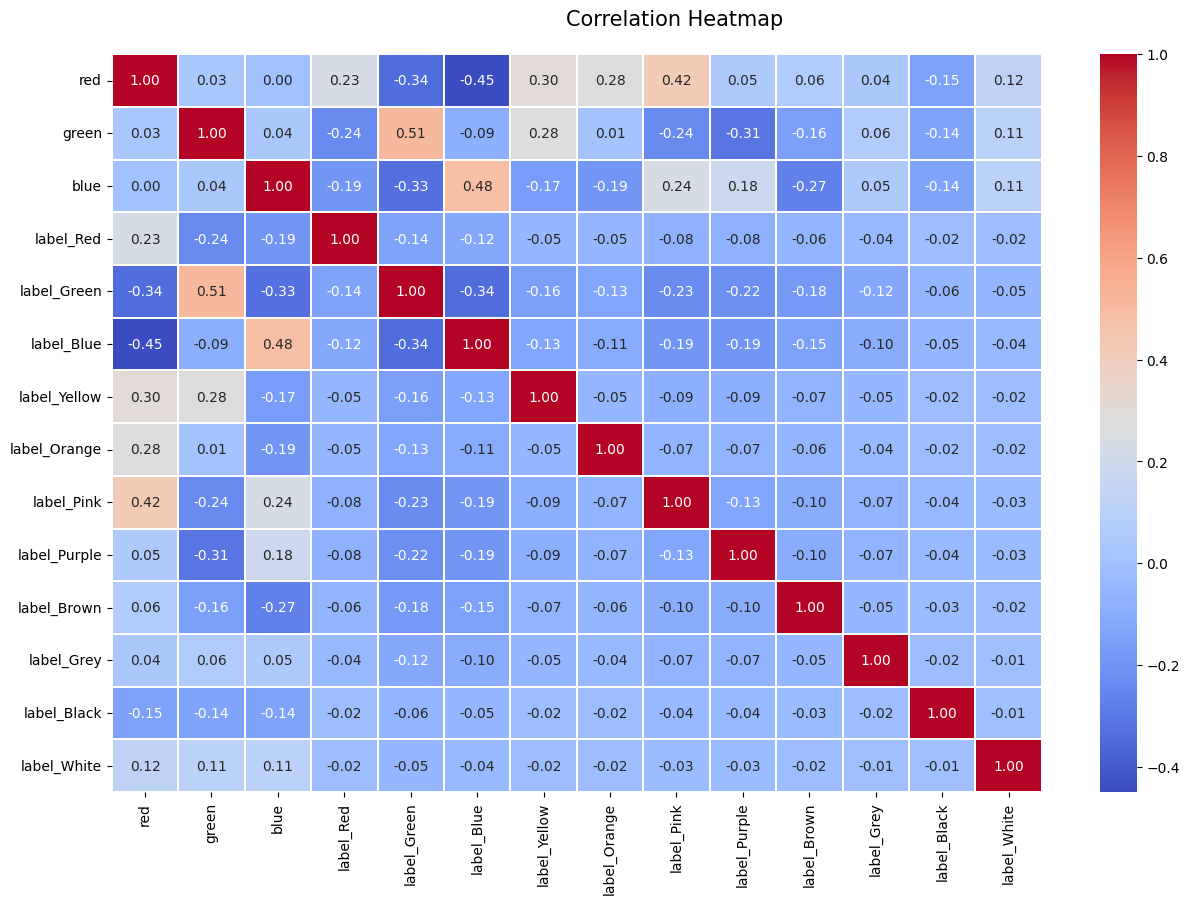

In [17]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(15, 9))
corr = dataset.corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Correlation Heatmap', fontsize=15)

In [18]:
train_dataset = dataset.sample(frac=0.8, random_state=8) #train = 80%,  random_state = any int value means every time when you run your program you will get the same output for train and test dataset, random_state is None by default which means every time when you run your program you will get different output because of splitting between train and test varies within
test_dataset = dataset.drop(train_dataset.index) #remove train_dataset from dataframe to get test_dataset
train_dataset

,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4185,189,148,192,0,0,0,0,0,0,1,0,0,0,0
3378,178,251,22,0,0,0,1,0,0,0,0,0,0,0
2744,54,9,125,0,0,1,0,0,0,0,0,0,0,0
968,119,147,60,0,1,0,0,0,0,0,0,0,0,0
2286,230,161,233,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1883,223,157,205,0,0,0,0,0,0,1,0,0,0,0
3707,203,8,10,1,0,0,0,0,0,0,0,0,0,0
881,154,153,123,0,0,0,0,0,0,0,0,1,0,0
1352,151,141,236,0,0,0,0,0,0,1,0,0,0,0


In [19]:

test_dataset


,red,green,blue,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
5,199,150,175,0,0,0,0,0,1,0,0,0,0,0
11,249,99,108,0,0,0,0,0,1,0,0,0,0,0
13,180,134,41,0,0,0,0,0,0,0,1,0,0,0
17,249,15,198,0,0,0,0,0,1,0,0,0,0,0
21,159,253,91,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5042,21,21,21,0,0,0,0,0,0,0,0,0,1,0
5043,22,22,22,0,0,0,0,0,0,0,0,0,1,0
5046,25,25,25,0,0,0,0,0,0,0,0,0,1,0
5047,26,26,26,0,0,0,0,0,0,0,0,0,1,0


In [20]:
train_labels = pd.DataFrame([train_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
train_labels


,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
4185,0,0,0,0,0,0,1,0,0,0,0
3378,0,0,0,1,0,0,0,0,0,0,0
2744,0,0,1,0,0,0,0,0,0,0,0
968,0,1,0,0,0,0,0,0,0,0,0
2286,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1883,0,0,0,0,0,0,1,0,0,0,0
3707,1,0,0,0,0,0,0,0,0,0,0
881,0,0,0,0,0,0,0,0,1,0,0
1352,0,0,0,0,0,0,1,0,0,0,0


In [21]:

train_dataset

,red,green,blue
4185,189,148,192
3378,178,251,22
2744,54,9,125
968,119,147,60
2286,230,161,233
...,...,...,...
1883,223,157,205
3707,203,8,10
881,154,153,123
1352,151,141,236


In [22]:
test_labels = pd.DataFrame([test_dataset.pop(x) for x in ['label_Red', 'label_Green', 'label_Blue', 'label_Yellow', 'label_Orange', 'label_Pink', 'label_Purple', 'label_Brown', 'label_Grey', 'label_Black', 'label_White']]).T
test_labels

,label_Red,label_Green,label_Blue,label_Yellow,label_Orange,label_Pink,label_Purple,label_Brown,label_Grey,label_Black,label_White
5,0,0,0,0,0,1,0,0,0,0,0
11,0,0,0,0,0,1,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,0
17,0,0,0,0,0,1,0,0,0,0,0
21,0,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5042,0,0,0,0,0,0,0,0,0,1,0
5043,0,0,0,0,0,0,0,0,0,1,0
5046,0,0,0,0,0,0,0,0,0,1,0
5047,0,0,0,0,0,0,0,0,0,1,0


In [23]:

test_dataset

,red,green,blue
5,199,150,175
11,249,99,108
13,180,134,41
17,249,15,198
21,159,253,91
...,...,...,...
5042,21,21,21
5043,22,22,22
5046,25,25,25
5047,26,26,26


In [24]:

from keras import regularizers
model = keras.Sequential([
    layers.Dense(3, kernel_regularizer=regularizers.l2(0.001), activation='relu', input_shape=[len(train_dataset.keys())]), #inputshape=[3]
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(24, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(16, kernel_regularizer=regularizers.l2(0.001), activation='relu'),
    layers.Dense(11)
  ])

In [25]:

optimizer = keras.optimizers.Adam(learning_rate=0.001)
loss_function = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(loss=loss_function,
                optimizer=optimizer,
                metrics=['accuracy'])


In [26]:

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [27]:
history = model.fit(x=train_dataset, y=train_labels,
                    validation_split=0.2,
                    epochs=1000,
                    batch_size=2048,
                    verbose=0,
                    callbacks=[tfdocs.modeling.EpochDots()],
                    shuffle=True)


Epoch: 0, accuracy:0.0798,  loss:2.5704,  val_accuracy:0.1953,  val_loss:2.5157,  
....................................................................................................
Epoch: 100, accuracy:0.5639,  loss:1.3022,  val_accuracy:0.5575,  val_loss:1.3229,  
....................................................................................................
Epoch: 200, accuracy:0.7711,  loss:0.6048,  val_accuracy:0.7441,  val_loss:0.6378,  
....................................................................................................
Epoch: 300, accuracy:0.7952,  loss:0.5190,  val_accuracy:0.7689,  val_loss:0.5371,  
....................................................................................................
Epoch: 400, accuracy:0.8268,  loss:0.4514,  val_accuracy:0.8084,  val_loss:0.4656,  
....................................................................................................
Epoch: 500, accuracy:0.8586,  loss:0.3949,  val_accuracy:0.8455,  val_l

In [28]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.329362,0.871946,0.337634,0.882571,995
996,0.326034,0.877204,0.337496,0.878863,996
997,0.324244,0.878750,0.339861,0.876391,997
998,0.323338,0.880916,0.338620,0.877627,998
999,0.325167,0.875657,0.339225,0.877627,999


In [29]:

plotter = tfdocs.plots.HistoryPlotter(smoothing_std=2)

Text(0, 0.5, 'accuracy [Color]')

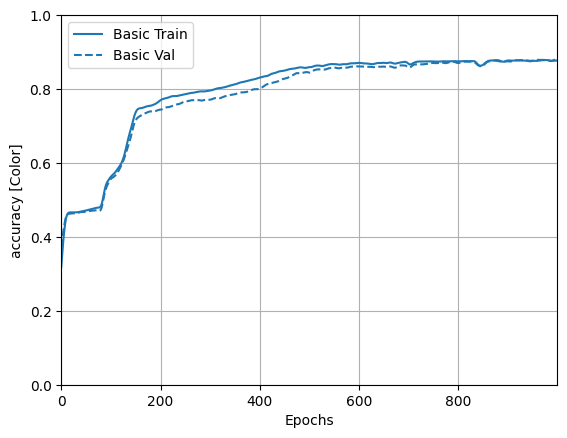

In [30]:
plotter.plot({'Basic': history}, metric = "accuracy")
plt.ylim([0, 1])
plt.ylabel('accuracy [Color]')

Text(0, 0.5, 'loss [Color]')

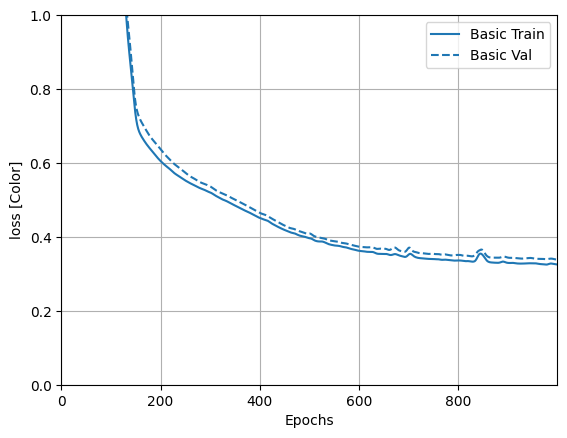

In [31]:

plotter.plot({'Basic': history}, metric = "loss")
plt.ylim([0, 1])
plt.ylabel('loss [Color]')


In [32]:

#Install PyDrive library into Google Colab notebook
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [33]:

#Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [34]:

!pip install pyyaml h5py  # Required to save models in HDF5 format

In [37]:
drive.CreateFile({'id': model_file.get('id')}) ### very important to run this last cell for loading the model in new notebook

GoogleDriveFile({'id': '1QDiUgWEMPsfIjCWAAfr4qU6QZu7B0PT8'})

In [36]:

# Save Model or weights on google drive and create on Colab directory in Google Drive

# Save the entire model to a HDF5 file.
# The '.h5' extension indicates that the model should be saved to HDF5.
model.save('colormodel_acu_90.h5')
model_file = drive.CreateFile({'title' : 'colormodel_acu_90.h5'}) # colormodel_acu_  .h5 is the name of the model uploaded to Drive
model_file.SetContentFile('colormodel_acu_90.h5')
model_file.Upload()

In [40]:
#Load model from google drive into colab
file_obj = drive.CreateFile({'id': '1QDiUgWEMPsfIjCWAAfr4qU6QZu7B0PT8'})
file_obj.GetContentFile('colormodel_trained_90.h5') #colormodel_trained.h5 is the name of model uploaded to colab


In [41]:

# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('colormodel_trained_90.h5') #very important

# Show the model architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 24)                96        
                                                                 
 dense_2 (Dense)             (None, 24)                600       
                                                                 
 dense_3 (Dense)             (None, 16)                400       
                                                                 
 dense_4 (Dense)             (None, 11)                187       
                                                                 
Total params: 1,295
Trainable params: 1,295
Non-trainable params: 0
_________________________________________________________________


In [42]:

train_predictions = model.predict(train_dataset)
train_predictions

127/127 [==============================] - 0s 2ms/step


array([[-10.074565 , -20.999617 ,  -5.7899313, ...,  -6.615613 ,
        -19.57194  ,  -9.742558 ],
       [-16.969095 ,  27.520424 ,  -4.699533 , ...,  -2.690036 ,
        -30.019564 ,  -4.0392756],
       [-11.374447 , -13.581463 ,   8.299837 , ...,  -1.8878082,
         -3.8164663,  -9.946229 ],
       ...,
       [ -6.156814 ,   1.0564873,  -5.570637 , ...,   1.7350315,
        -12.559317 ,  -5.71465  ],
       [-16.057165 , -21.822886 ,   5.18108  , ...,  -5.045982 ,
        -17.28272  ,  -9.1548   ],
       [-10.421635 ,  10.787068 , -15.891585 , ...,  -2.1204545,
        -26.653002 , -11.288259 ]], dtype=float32)

In [43]:

actual_encoded_train_labels = np.argmax(train_labels.to_numpy(), axis=1) #train_labels were originally in one-hot
actual_encoded_train_labels

array([6, 3, 2, ..., 8, 6, 3])

In [44]:

predicted_encoded_train_labels = np.argmax(train_predictions, axis=1)
predicted_encoded_train_labels

array([6, 1, 2, ..., 8, 2, 3])

In [45]:
actual_encoded_train_labels = pd.DataFrame(actual_encoded_train_labels, columns=['Labels'])
actual_encoded_train_labels

,Labels
0,6
1,3
2,2
3,1
4,5
...,...
4037,6
4038,0
4039,8
4040,6


In [46]:

predicted_encoded_train_labels = pd.DataFrame(predicted_encoded_train_labels, columns=['Labels'])
predicted_encoded_train_labels

,Labels
0,6
1,1
2,2
3,1
4,5
...,...
4037,5
4038,0
4039,8
4040,2


In [47]:
#Plot Actual vs Predicted Class for Training Dataset
actual_chart = go.Scatter(x=actual_encoded_train_labels.index, y=actual_encoded_train_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_train_labels.index, y=predicted_encoded_train_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])

In [48]:
test_predictions = model.predict(test_dataset)
test_predictions


32/32 [==============================] - 0s 2ms/step


array([[ -7.5037303 , -17.607553  ,  -8.417165  , ...,  -7.511714  ,
        -21.326004  ,  -9.223396  ],
       [  0.29813486, -28.408289  , -22.573391  , ..., -24.978888  ,
        -34.35406   , -18.372364  ],
       [ -4.3585014 ,  -0.05700123, -14.415613  , ...,  -3.3808012 ,
        -17.853212  , -10.5875025 ],
       ...,
       [ -2.866362  ,   2.7959962 ,   2.5405266 , ...,   6.461445  ,
          9.197374  ,  -7.532358  ],
       [ -2.9117336 ,   2.7258792 ,   2.4894872 , ...,   6.4544926 ,
          9.036415  ,  -7.500616  ],
       [ -3.047851  ,   2.515528  ,   2.3363686 , ...,   6.433634  ,
          8.553537  ,  -7.405388  ]], dtype=float32)

In [49]:

actual_encoded_test_labels = np.argmax(test_labels.to_numpy(), axis=1)
actual_encoded_test_labels

array([5, 5, 7, ..., 9, 9, 9])

In [50]:
predicted_encoded_test_labels = np.argmax(test_predictions, axis=1)
predicted_encoded_test_labels

array([5, 0, 7, ..., 9, 9, 9])

In [51]:

actual_encoded_test_labels = pd.DataFrame(actual_encoded_test_labels, columns=['Labels'])
actual_encoded_test_labels


,Labels
0,5
1,5
2,7
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


In [52]:
predicted_encoded_test_labels = pd.DataFrame(predicted_encoded_test_labels, columns=['Labels'])
predicted_encoded_test_labels

,Labels
0,5
1,0
2,7
3,5
4,1
...,...
1005,9
1006,9
1007,9
1008,9


In [53]:

#Plot Actual vs Predicted Class for Test Dataset
actual_chart = go.Scatter(x=actual_encoded_test_labels.index, y=actual_encoded_test_labels.Labels, name= 'Actual Label')
predict_chart = go.Scatter(x=actual_encoded_test_labels.index, y=predicted_encoded_test_labels.Labels, name= 'Predicted Label')
py.iplot([predict_chart, actual_chart])


In [54]:
model.evaluate(x=train_dataset, y=train_labels)

127/127 [==============================] - 1s 3ms/step - loss: 0.3269 - accuracy: 0.8790


[0.3268756568431854, 0.8790202736854553]

In [55]:

from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix_train = confusion_matrix(actual_encoded_train_labels, predicted_encoded_train_labels)
confusion_matrix_train

array([[ 154,    0,    0,    0,    9,   14,    0,   13,    0,    0,    0],
       [   0, 1093,   29,   15,    0,    0,    0,    6,    8,    1,    0],
       [   0,   26,  832,    0,    0,    0,   26,    0,    3,    1,    0],
       [   0,   40,    0,  164,   16,    0,    0,    5,    0,    0,    0],
       [  15,    0,    0,   11,  126,    1,    0,   14,    0,    0,    0],
       [  16,    0,    0,    0,    0,  411,   40,    5,    0,    0,    0],
       [   1,    0,   24,    0,    0,   45,  357,    9,    8,    1,    0],
       [   5,    3,    0,    3,   11,    3,    6,  277,    3,    2,    0],
       [   0,   14,   13,    1,    0,    0,    4,    9,   92,    0,    0],
       [   0,    0,    2,    0,    0,    0,    2,    0,    1,   33,    0],
       [   0,    0,    0,    1,    0,    1,    0,    0,    3,    0,   14]])

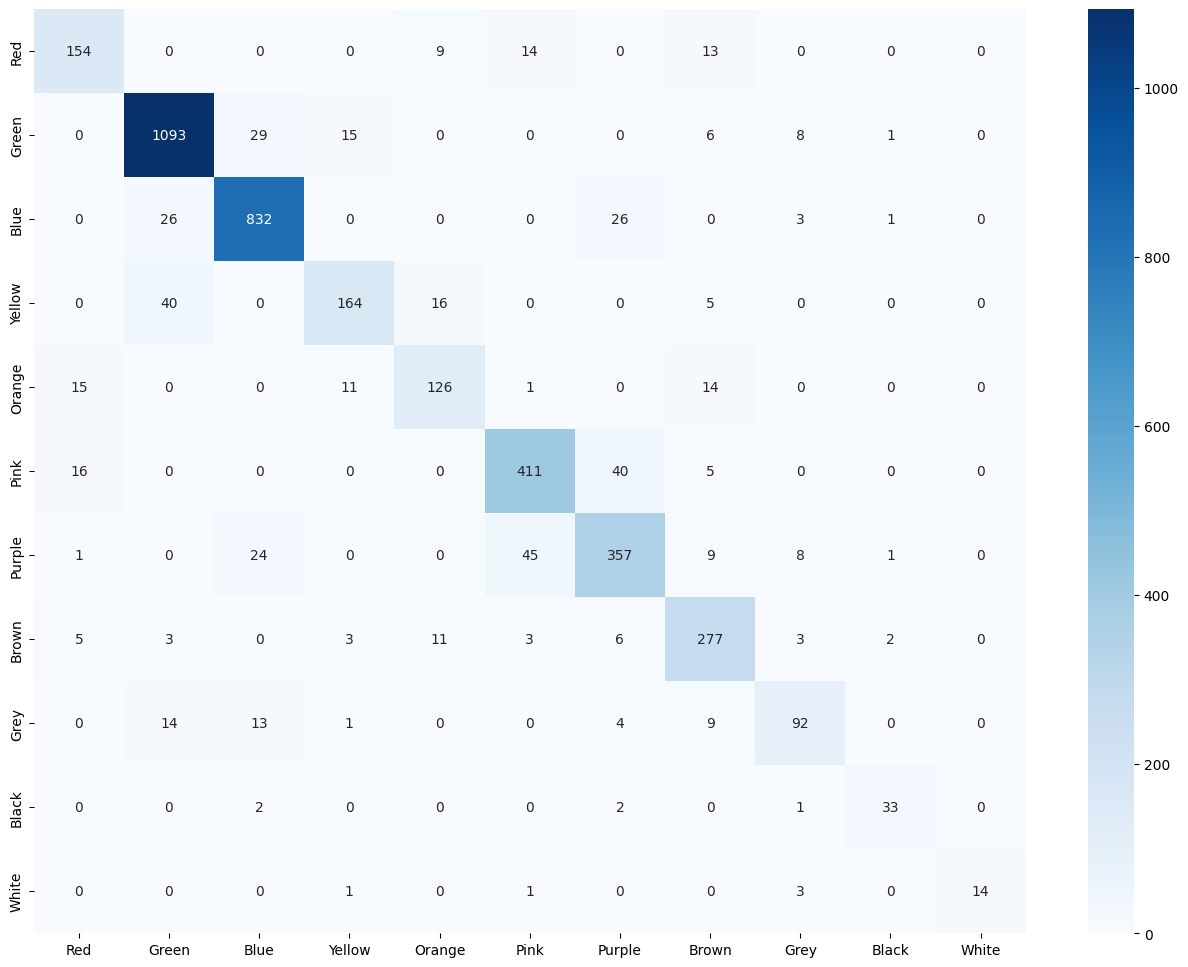

In [56]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_train, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [57]:
#newest model performance report
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_train_labels, predicted_encoded_train_labels, target_names=target_names))

              precision    recall  f1-score   support

         Red       0.81      0.81      0.81       190
       Green       0.93      0.95      0.94      1152
        Blue       0.92      0.94      0.93       888
      Yellow       0.84      0.73      0.78       225
      Orange       0.78      0.75      0.77       167
        Pink       0.87      0.87      0.87       472
      Purple       0.82      0.80      0.81       445
       Brown       0.82      0.88      0.85       313
        Grey       0.78      0.69      0.73       133
       Black       0.87      0.87      0.87        38
       White       1.00      0.74      0.85        19

    accuracy                           0.88      4042
   macro avg       0.86      0.82      0.84      4042
weighted avg       0.88      0.88      0.88      4042



In [58]:
model.evaluate(x=test_dataset, y=test_labels)

32/32 [==============================] - 0s 5ms/step - loss: 0.3541 - accuracy: 0.8881


[0.3540891408920288, 0.8881188035011292]

In [59]:
confusion_matrix_test = confusion_matrix(actual_encoded_test_labels, predicted_encoded_test_labels)
confusion_matrix_test


array([[ 42,   0,   0,   0,   0,   2,   0,   2,   0,   0,   0],
       [  0, 292,   9,   1,   0,   1,   0,   1,   1,   0,   0],
       [  0,   3, 208,   0,   0,   0,   6,   0,   2,   0,   0],
       [  0,  14,   0,  40,   4,   0,   0,   2,   0,   0,   0],
       [  3,   0,   0,   3,  29,   0,   0,   3,   0,   0,   0],
       [  7,   0,   0,   0,   0,  93,   4,   3,   0,   0,   0],
       [  0,   0,   7,   0,   0,  11,  88,   1,   0,   1,   0],
       [  1,   1,   0,   2,   2,   0,   0,  56,   0,   1,   0],
       [  0,   2,   2,   1,   0,   0,   3,   3,  30,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  13,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   4,   0,   6]])

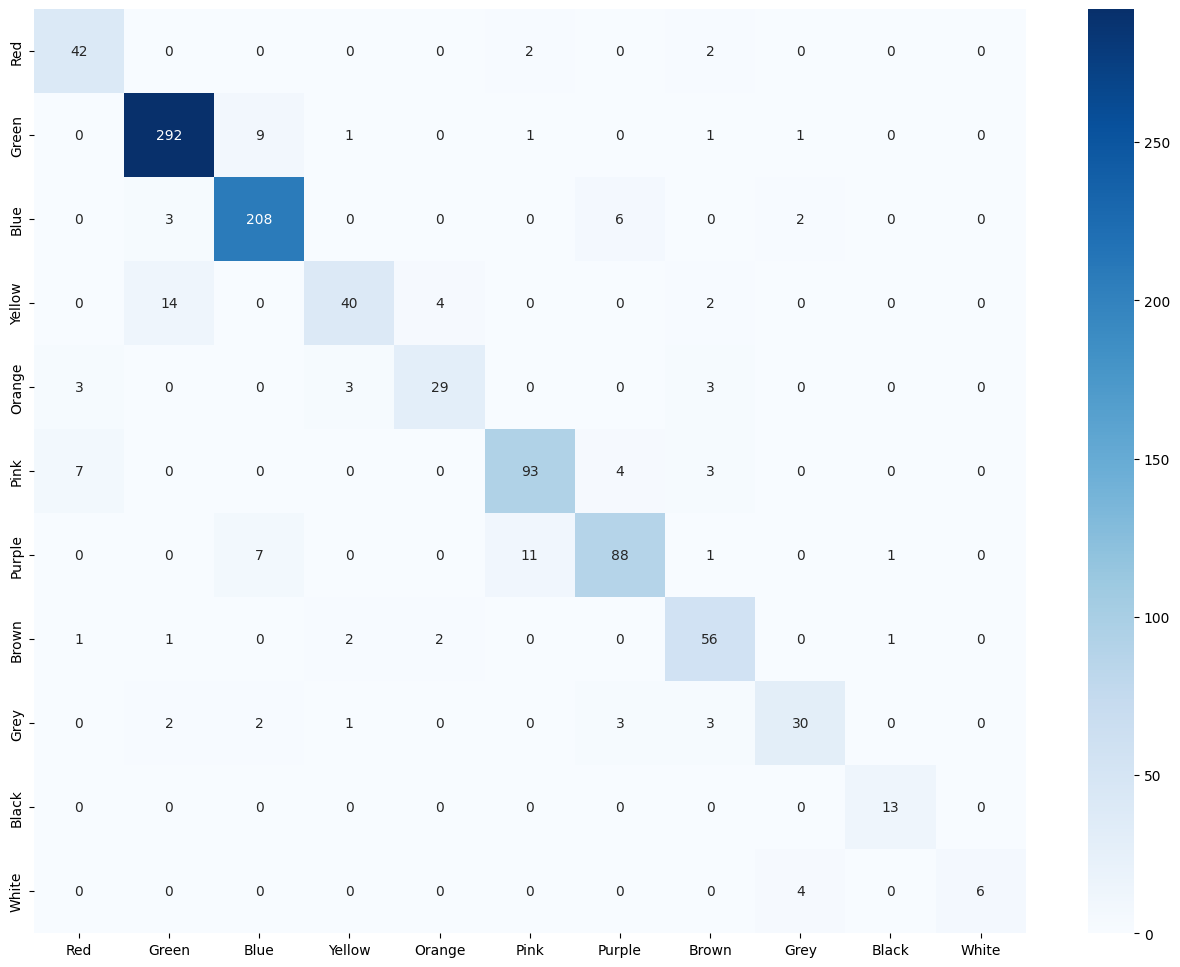

In [60]:
f,ax = plt.subplots(figsize=(16,12))
categories = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
sns.heatmap(confusion_matrix_test, annot=True, cmap='Blues', fmt='d',
            xticklabels = categories,
            yticklabels = categories)
plt.show()

In [61]:
target_names = ['Red', 'Green', 'Blue', 'Yellow', 'Orange', 'Pink', 'Purple', 'Brown', 'Grey', 'Black', 'White']
print(classification_report(actual_encoded_test_labels, predicted_encoded_test_labels, target_names=target_names))


              precision    recall  f1-score   support

         Red       0.79      0.91      0.85        46
       Green       0.94      0.96      0.95       305
        Blue       0.92      0.95      0.93       219
      Yellow       0.85      0.67      0.75        60
      Orange       0.83      0.76      0.79        38
        Pink       0.87      0.87      0.87       107
      Purple       0.87      0.81      0.84       108
       Brown       0.79      0.89      0.84        63
        Grey       0.81      0.73      0.77        41
       Black       0.87      1.00      0.93        13
       White       1.00      0.60      0.75        10

    accuracy                           0.89      1010
   macro avg       0.87      0.83      0.84      1010
weighted avg       0.89      0.89      0.89      1010



In [62]:
#Libraries to visualize model
!pip install ann_visualizer
!pip install graphviz


  Preparing metadata (setup.py) ... done
  Created wheel for ann_visualizer: filename=ann_visualizer-2.5-py3-none-any.whl size=4167 sha256=270a9c99f8a9ce56347896d6f69b7536bf8210ede811a8b9e3556518492a59dd
  Stored in directory: /root/.cache/pip/wheels/6e/0f/ae/f5dba91db71b1b32bf03d0ad18c32e86126093aba5ec6b6488
Successfully built ann_visualizer


In [63]:
from ann_visualizer.visualize import ann_viz;
model.load_weights("colormodel_trained_90.h5")
ann_viz(model, title="Artificial Neural network - RGB Color Classifier Model Visualization")
#The result is a file (.pdf) that will be saved in the project directory
